## IDEA:
### Suscribers are less likely than Customers to pay extra time fees per ride
Suscriber = people enrolled with a 1 year contract to use Citibike

Customer = people that buy a Day-pass or a 3-Day-pass to use Citibike, normally associated wih tourists.

Note: the limit usage time without extra charges is different for Suscribers and Customers

Max time for Customers = 30min = 1800 sec  

Max time for Suscribers = 45min = 2700 sec

## NULL HYPOTHESIS:
The ratio of Suscribers rides paying extra fees over the total Suscribers rides is the same or higher than the ratio of Customers rides paying extra fees over the total Customers rides


$$
H_0:\frac{E_{subscriber}}{N_{subscriber}}>=\frac{E_{customer}}{N_{customer}}
$$

## Alternative  HYPOTHESIS:
The ratio of Suscribers rides paying extra fees over the total Suscribers rides is the smaller than the ratio of Customers rides paying extra fees over the total Customers rides

$$
H_1:\frac{E_{subscriber}}{N_{subscriber}}<\frac{E_{customer}}{N_{customer}}
$$



or identically:

$$
H_0:\frac{E_{customer}}{N_{customer}}-\frac{E_{subscriber}}{N_{subscriber}}<=0
$$

$$
H_1:\frac{E_{customer}}{N_{customer}}-\frac{E_{subscriber}}{N_{subscriber}}>0
$$




## I will use a significance level $\alpha=0.05$



In [59]:
### Corrected formulation of hypothesis to solve typo from Dr. Federica Bianco's review
## importin libraries
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [60]:
## Code to retrive the data from the web and unzip it. From Dr. Federica Bianco
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

### I am using data from the year 2016 from the months of February, April and June
#### You can see that the number of trips during summer is bigger than during winter, as well the number of Customer rides increase more in the warmer months.

In [61]:
datestring = '201604'
getCitiBikeCSV(datestring)
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

file in place, you can continue


In [62]:
datestring = '201606'
getCitiBikeCSV(datestring)
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

file in place, you can continue


In [63]:
datestring = '201602'
getCitiBikeCSV(datestring)
df3 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

file in place, you can continue


In [64]:
frames = [df1, df2, df3]
df = pd.concat(frames)

In [65]:
#datestring = '201601'
#getCitiBikeCSV(datestring)
df=df.reset_index()
df.head(3)

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,0,496,4/1/2016 00:00:26,4/1/2016 00:08:42,254,W 11 St & 6 Ave,40.735324,-73.998004,236,St Marks Pl & 2 Ave,40.728419,-73.987140,19704,Subscriber,1984.0,1
1,1,104,4/1/2016 00:00:27,4/1/2016 00:02:12,311,Norfolk St & Broome St,40.717227,-73.988021,350,Clinton St & Grand St,40.715595,-73.987030,21555,Subscriber,1970.0,1
2,2,128,4/1/2016 00:00:30,4/1/2016 00:02:38,3064,Myrtle Ave & Lewis Ave,40.696820,-73.937569,3059,Pulaski St & Marcus Garvey Blvd,40.693398,-73.939877,17430,Subscriber,1986.0,1


In [66]:

#df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
# note that with dataframes I can refer to variables as dictionary keys, 
#df.head()

In [67]:
df.columns

Index([u'index', u'tripduration', u'starttime', u'stoptime',
       u'start station id', u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [68]:
## Here I am dropping the columns that are not needed for this analysis
df.drop(['stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', 'gender', 'index'], axis = 1, inplace = True)

In [69]:
#Dropping NaN values
df = df.dropna() 
df.head()

,tripduration,starttime,usertype
0,496,4/1/2016 00:00:26,Subscriber
1,104,4/1/2016 00:00:27,Subscriber
2,128,4/1/2016 00:00:30,Subscriber
3,1197,4/1/2016 00:00:34,Subscriber
4,419,4/1/2016 00:00:46,Subscriber


In [70]:
#Max time for Customers = 30min = 1800 seg
#Max time for Suscribers = 45min = 2700 seg
Customer = 1800
Subscriber = 2700


In [71]:
# I am creating a new column to identify the users that paid extra fee because they exceeded the time
df['Extra Charge'] = ((df['tripduration'] >= Customer) & (df['usertype'] == 'Customer') ) | \
                    (df['tripduration'] >= Subscriber) & (df['usertype'] == 'Subscriber')
df.head()

,tripduration,starttime,usertype,Extra Charge
0,496,4/1/2016 00:00:26,Subscriber,False
1,104,4/1/2016 00:00:27,Subscriber,False
2,128,4/1/2016 00:00:30,Subscriber,False
3,1197,4/1/2016 00:00:34,Subscriber,False
4,419,4/1/2016 00:00:46,Subscriber,False


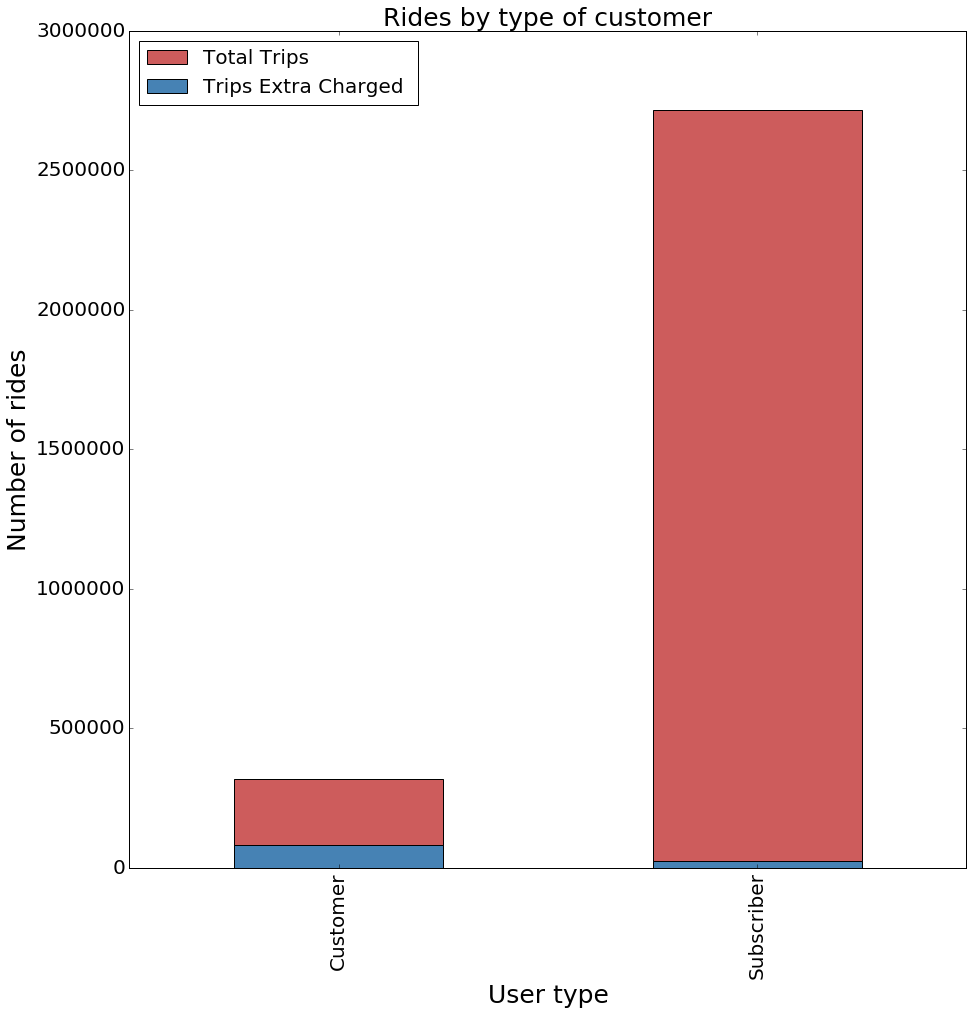

In [72]:
#I am using pandas to plot in bars the number of trips per User type and as well add the extra charged trips

fig = pl.figure(figsize(15,15))

##Plot the total number of trips per user, groupby method helps to distribute according to the values in
## usertype column
ax = df['tripduration'].groupby([df['usertype']]).count().plot(kind = "bar", color = 'IndianRed',\
                                                             label = 'Total Trips', fontsize = 20)
##Plot the total number of extra charged trips per user
ax = df['tripduration'][df['Extra Charge'] == True].groupby([df['usertype']]).count().plot(kind = "bar",\
                                            color = 'SteelBlue', label = 'Trips Extra Charged ', fontsize = 20)
ax.set_ylabel ("Number of rides", fontsize = 25)
ax.set_xlabel ("User type",fontsize = 25)     
ax.set_title('Rides by type of customer', fontsize = 25)
                
pl.legend(loc = 2, fontsize = 20)

In [73]:
df.head()


,tripduration,starttime,usertype,Extra Charge
0,496,4/1/2016 00:00:26,Subscriber,False
1,104,4/1/2016 00:00:27,Subscriber,False
2,128,4/1/2016 00:00:30,Subscriber,False
3,1197,4/1/2016 00:00:34,Subscriber,False
4,419,4/1/2016 00:00:46,Subscriber,False


### Add error bars for count statictics error

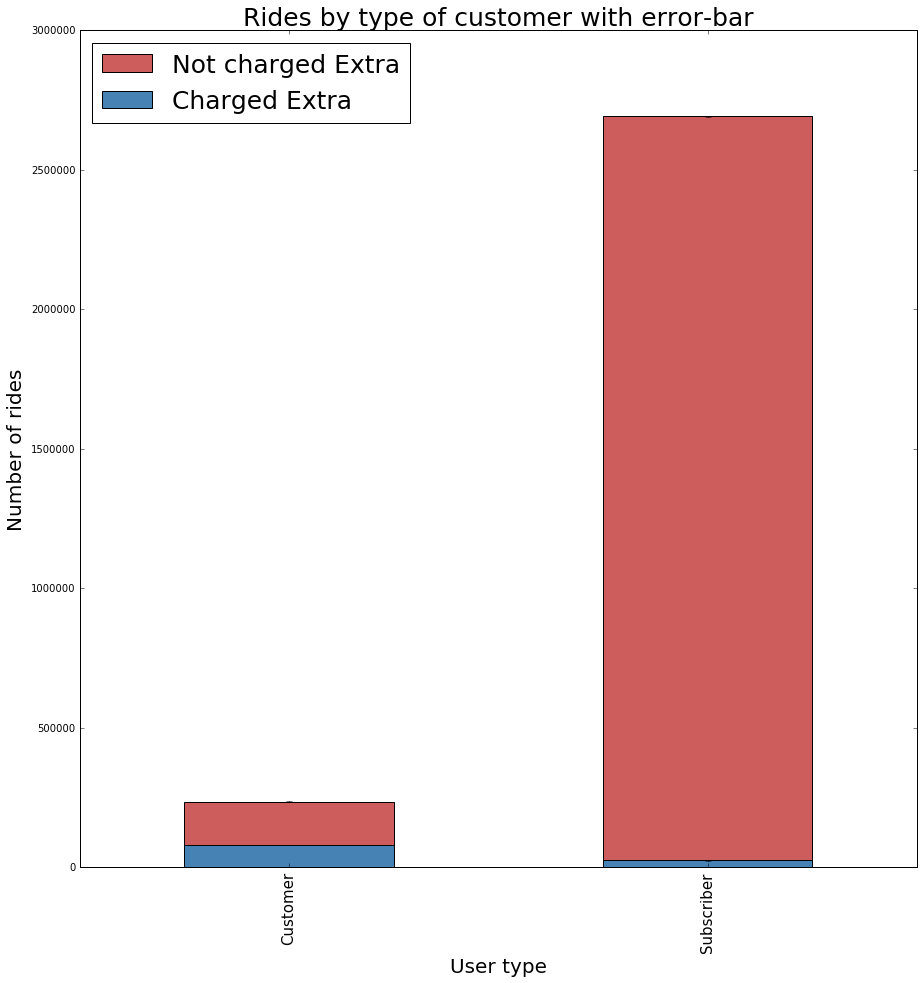

In [74]:
### error calculation and plotting
### because the counts are big the errors are small and a zoom  to the plot will be needed
fig = pl.figure(figsize(15,15))
counts_f = df.usertype[df['Extra Charge'] == False].groupby([df['usertype']]).count()
norm_f = 1
error_f = np.sqrt(counts_f)
ax=((counts_f) / norm_f).plot(kind="bar",color='IndianRed',  yerr=[((error_f) / norm_f, \
                                           (error_f) / norm_f)], label='Not charged Extra')

counts_t = df.usertype[df['Extra Charge'] == True].groupby([df['usertype']]).count()
norm_t = 1
error_t = np.sqrt(counts_t)
ax=((counts_t) / norm_t).plot(kind="bar",color='SteelBlue',  yerr=[((error_t) / norm_t, \
                                           (error_t) / norm_t)], label='Charged Extra')
ax.set_ylabel ("Number of rides", fontsize = 20)
ax.set_xlabel ("User type",fontsize = 20)    
ax.set_xticklabels(['Customer','Subscriber'],size=15)
ax.set_title('Rides by type of customer with error-bar', fontsize = 25)

pl.legend(loc = 2, fontsize = 25)


### Zoomed plot with error bars for count statictics error

usertype
Customer      81294
Subscriber    24930
Name: usertype, dtype: int64

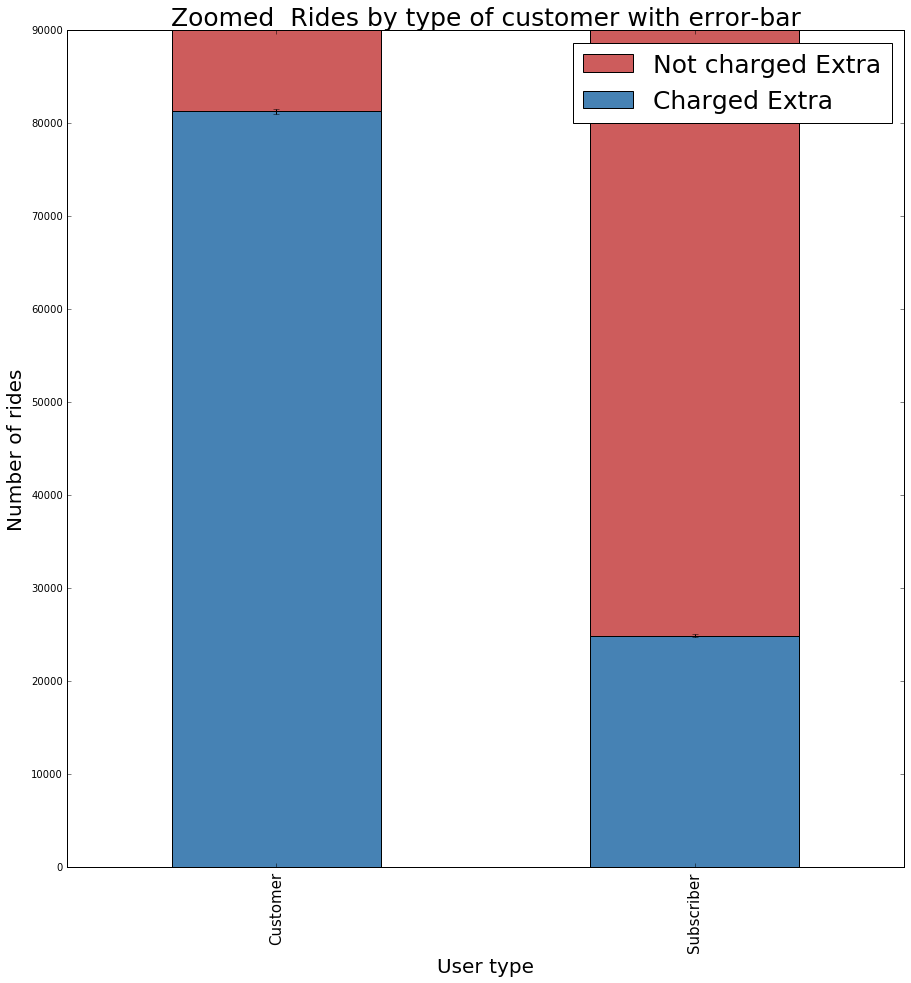

In [75]:
fig = pl.figure(figsize(15,15))
counts_f = df.usertype[df['Extra Charge'] == False].groupby([df['usertype']]).count()
norm_f = 1
error_f = np.sqrt(counts_f)
ax=((counts_f) / norm_f).plot(kind="bar",color='IndianRed',  yerr=[((error_f) / norm_f, \
                                           (error_f) / norm_f)], label='Not charged Extra')

counts_t = df.usertype[df['Extra Charge'] == True].groupby([df['usertype']]).count()
norm_t = 1
error_t = np.sqrt(counts_t)
ax=((counts_t) / norm_t).plot(kind="bar",color='SteelBlue',  yerr=[((error_t) / norm_t, \
                                           (error_t) / norm_t)], label='Charged Extra')
ax.set_ylabel ("Number of rides", fontsize = 20)
ax.set_xlabel ("User type",fontsize = 20)    
ax.set_xticklabels(['Customer','Subscriber'],size=15)
ax.set_title('Zoomed  Rides by type of customer with error-bar', fontsize = 25)
ax.set_ylim(0,90000)
pl.legend(loc = 1, fontsize = 25)
counts_t

### Plot of the Ratio of trips extra charged trip uder User type total rides 

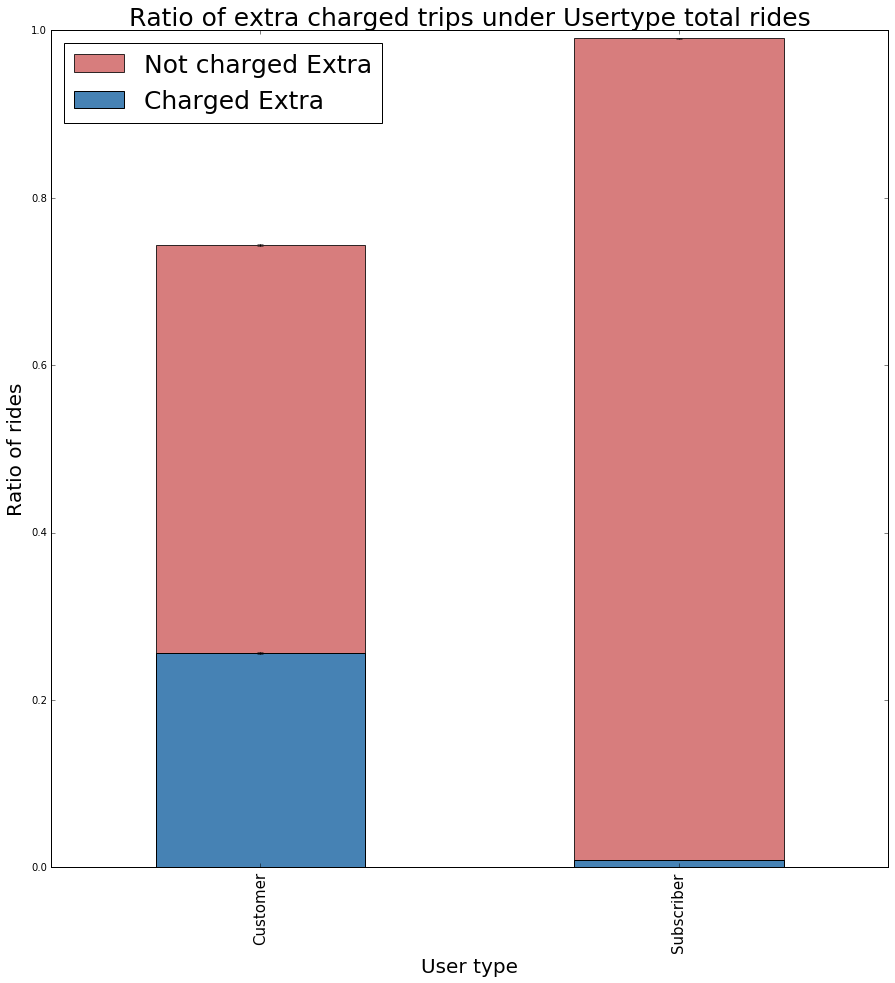

In [76]:
fig = pl.figure(figsize(15,15))
counts_f = df.usertype[df['Extra Charge'] == False].groupby([df['usertype']]).count()
counts_t = df.usertype[df['Extra Charge'] == True].groupby([df['usertype']]).count()
totalCustomer = len(df[(df['usertype'] == 'Customer')])

totalSubscriber = len(df[(df['usertype'] == 'Subscriber')])

norm = [totalCustomer, totalSubscriber]
error_f = np.sqrt(counts_f)
ax=((counts_f) / norm).plot(kind="bar",color='IndianRed',  yerr=[((error_f) / norm, \
                                           (error_f) / norm)], label='Not charged Extra',alpha=.8)

counts_t = df.usertype[df['Extra Charge'] == True].groupby([df['usertype']]).count()

error_t = np.sqrt(counts_t)
ax=((counts_t) / norm).plot(kind="bar",color='SteelBlue',  yerr=[((error_t) / norm, \
                                           (error_t) / norm)], label='Charged Extra')
ax.set_ylabel ("Ratio of rides", fontsize = 20)
ax.set_xlabel ("User type",fontsize = 20)    
ax.set_xticklabels(['Customer','Subscriber'],size=15)
ax.set_title('Ratio of extra charged trips under Usertype total rides', fontsize = 25)

pl.legend(loc = 2, fontsize = 25)



### Total Number of Trips

In [77]:
totaltrips = len(df[(df['usertype'] == 'Subscriber') | (df['usertype'] == 'Customer')])
totaltrips

3034341

### Total Number of Trips for the user type Customer

In [78]:
totalCustomer = len(df[(df['usertype'] == 'Customer')])
totalCustomer

317122

### Total Number of Trips for the user type Subscriber

In [79]:
totalSubscriber = len(df[(df['usertype'] == 'Subscriber')])
totalSubscriber

2717219

### Total Number of  Extra charged Trips by user type 

In [80]:
ExtraCustomer = len(df[(df['Extra Charge'] == True) & (df['usertype'] == 'Customer')])
ExtraCustomer

81294

In [81]:
ExtraSubscriber=len(df[(df['Extra Charge'] == True) & (df['usertype'] == 'Subscriber')])
ExtraSubscriber

24930

### Ratio calculation  Extra charged Trips/Total Number of trip by user type 

In [82]:
ratioSubscriber = ExtraSubscriber / totalSubscriber
ratioCustomer = ExtraCustomer / totalCustomer
print('Ratio of Customers Charged Extra: ', ratioCustomer*100,'%')
print('Ratio of Subscribers Charged Extra: ', ratioSubscriber*100, '%')

Ratio of Customers Charged Extra:  25.634929144 %
Ratio of Subscribers Charged Extra:  0.91748217571 %


In [83]:
if ratioSubscriber >= ratioCustomer:
    print("In accordance with Null Hypothesis")
else:
    print ("We must check the significance before we reject the Null Hypothesis")

We must check the significance before we reject the Null Hypothesis


### Evaluating Significance of the result with the  Z-test

In [84]:
# defining the functions that calculate the statistics
# the lambda style definition is NOT APPROVED BY PEP8 and you should avoind it
# but I am putting it here since you may encounter it in your coding life.
# confront the equation in the markdown cell above with these function to understand as they work

p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s
# calculations

sp_stdev = se(p(ratioCustomer, ratioSubscriber, totalCustomer, totalSubscriber),totalCustomer, totalSubscriber)
print ('Standard error = ',sp_stdev)
z = zscore(totalCustomer, totalSubscriber, sp_stdev)
print ("The z statistics is %.2f"%z) 

Standard error =  0.000344903688414
The z statistics is -6958745529.91


The Z value is larger than any value in the Z-tables and the maximum p-value is $p<0.0002$ and is smaller than the one chosen $\alpha=0.05$

This means that our analysis is statistically significant.

#### We can reject the NULL HYPOTHESIS:
The ratio of Suscribers rides paying extra fees over the total Suscribers rides is the same or higher than the ratio of Customers rides paying extra fees over the total Customers rides

### Evaluating Significance of the result with the  Chi-square

In [85]:
p=(ExtraCustomer+ExtraSubscriber)/totaltrips
p*100

3.5007271760161434

In [86]:
ratioCustomer

0.2563492914398875

In [87]:
ratioSubscriber

0.009174821757097974

In [88]:
def chisqrpartial(observed,expected):
    x=((observed-expected)**2)/expected
    return x

In [89]:
X=[]
X.append(chisqrpartial(ExtraCustomer,p*(totalCustomer)))
X.append(chisqrpartial(ExtraSubscriber,p*(totalSubscriber)))
X.append(chisqrpartial(totalCustomer-ExtraCustomer,(1-p)*(totalCustomer)))
X.append(chisqrpartial(totalSubscriber-ExtraSubscriber,(1-p)*(totalSubscriber)))
X

[443808.73188414355, 51796.16095447713, 16100.155402144552, 1879.0217061778426]

In [90]:
chisqr=sum(X)
print('The Chi-squared statistics is = ',chisqr)


The Chi-squared statistics is =  513584.069947


### To calculate DoF we have 2 different usertypes (Subscriber, Customer) and 2 different Extra Charged values (True, False)

In [91]:
rows = 2 #Subscriber or Customer
columns = 2 #True or False
DoF=(rows-1)*(columns-1)
print('The Dof is = ',DoF)

The Dof is =  1


The smallest P-value on the tables show p<.001 for a Chi-squared of 10.83 as for a DoF = 1
For chi-square statistic value for p = 0.05 (95% confidence level) with 1 degree of freedom -> 3.84

In [92]:
if chisqr > 3.84:
    print("The test is significant. We can reject the Null Hypothesis")
else:
    print ("The test is not significant to rject Null Hypothesis")

The test is significant. We can reject the Null Hypothesis
